In [1]:
import pandas as pd

In [2]:
listings = pd.read_csv(
    './data/Listings.csv', 
    encoding='latin1', 
    low_memory=False
    )

# Objective 1: Knowing The Data    

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

#### Casting column host_since to datetime format

> Can be done when importing csv

In [5]:
""" listings = pd.read_csv(
    './data/Listings.csv', 
    encoding='latin1', 
    low_memory=False,
    parse_dates=['host_since']
    ) """

" listings = pd.read_csv(\n    './data/Listings.csv', \n    encoding='latin1', \n    low_memory=False,\n    parse_dates=['host_since']\n    ) "

In [6]:
listings['host_since'].dtype

dtype('O')

In [7]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [8]:
listings['host_since'].dtype

dtype('<M8[ns]')

#### Filtering the data down to rows where the city is Paris and keeping only the columns 'host_since', 'neightbourhood', 'city', 'accommodates' and 'price'

In [9]:
""" listings = listings[listings['city'] == 'Paris']
paris_listings = paris_listings.filter(items=['host_since', 'neighbourhood', 'city', 'accommodates']) """

paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)

In [10]:
paris_listings['city'].unique()

array(['Paris'], dtype=object)

In [11]:
paris_listings.columns

Index(['host_since', 'neighbourhood', 'city', 'accommodates', 'price'], dtype='object')

In [12]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


#### Check for missing values, and calculate the minimum, maximum and average for each numeric field

In [13]:
# paris_listings.isna().any()
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [14]:
paris_listings[paris_listings['host_since'].isna() == True]

,host_since,neighbourhood,city,accommodates,price
52879,NaT,Enclos-St-Laurent,Paris,2,57
52880,NaT,Enclos-St-Laurent,Paris,2,58
52881,NaT,Batignolles-Monceau,Paris,4,90
52882,NaT,Buttes-Montmartre,Paris,5,89
52883,NaT,Hotel-de-Ville,Paris,2,119
52884,NaT,Buttes-Montmartre,Paris,4,50
52885,NaT,Enclos-St-Laurent,Paris,6,220
52886,NaT,Popincourt,Paris,2,45
52887,NaT,Popincourt,Paris,4,100
52888,NaT,Menilmontant,Paris,2,50


In [15]:
paris_listings.shape

(64690, 5)

In [16]:
paris_listings = paris_listings.dropna()

In [17]:
paris_listings.shape

(64657, 5)

In [18]:
paris_listings.isnull().any()

host_since       False
neighbourhood    False
city             False
accommodates     False
price            False
dtype: bool

In [19]:
paris_listings[paris_listings['host_since'].isnull() == True]

,host_since,neighbourhood,city,accommodates,price


In [20]:
paris_listings.dtypes

host_since       datetime64[ns]
neighbourhood            object
city                     object
accommodates              int64
price                     int64
dtype: object

In [21]:
paris_listings['accommodates'].min(), paris_listings['accommodates'].max(), paris_listings['accommodates'].mean()

(np.int64(0), np.int64(16), np.float64(3.037876796015899))

In [22]:
paris_listings['price'].min(), paris_listings['price'].max(), paris_listings['price'].mean()

(np.int64(0), np.int64(12000), np.float64(113.10461357625624))

In [23]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [24]:
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [25]:
paris_listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [26]:
paris_listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

# Objective 2: Preparing the data for visualization

#### Create table named paris_listings_neighbourhood that groups Paris listings by neighbourhood and calculates the mean price for each neighborhood sorted from lowest to highest average price

> Solution 1

In [27]:
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().sort_values()
pd.DataFrame(paris_listings_neighbourhood)

,price
neighbourhood,
Menilmontant,74.911561
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.222069
Reuilly,89.058402
Popincourt,90.518955
Gobelins,98.110184
Observatoire,101.873591
Batignolles-Monceau,102.615616
Enclos-St-Laurent,102.988752


> Solution 2

In [28]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby('neighbourhood')
    .agg(mean_price=('price', 'mean'))
    .sort_values('mean_price')
    .reset_index()
)
paris_listings_neighbourhood

,neighbourhood,mean_price
0,Menilmontant,74.911561
1,Buttes-Chaumont,82.690182
2,Buttes-Montmartre,87.222069
3,Reuilly,89.058402
4,Popincourt,90.518955
5,Gobelins,98.110184
6,Observatoire,101.873591
7,Batignolles-Monceau,102.615616
8,Enclos-St-Laurent,102.988752
9,Vaugirard,106.842073


#### Create table named paris_listings_accommodations. This table should be filtered down to the most expensive neighbourhood in Paris, grouped by accommodations column, and contain the mean price for each value of accommodates sorted from lowest to highest average price

In [29]:
most_expensive_neighbourhood = paris_listings_neighbourhood.loc[
    paris_listings_neighbourhood['mean_price']
    .idxmax()
    , 'neighbourhood'
]
most_expensive_neighbourhood

'Elysee'

> Solution 1

In [30]:
paris_listings_accommodations = (
    paris_listings[paris_listings['neighbourhood'] == most_expensive_neighbourhood]
    .groupby('accommodates')
    .agg(mean_price=('price', 'mean'))
    .sort_values('mean_price')
)

paris_listings_accommodations.head()

,mean_price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


> Solution 2

In [31]:
paris_listings_accommodates = (
    paris_listings
    .query(f"neighbourhood == '{most_expensive_neighbourhood}'")
    .groupby('accommodates')
    # getting the mean of the price and the count of rows for each value of accommodates
    # .agg({"price": "mean", "neighbourhood": "count"}) 
    .agg({"price": "mean"}) 
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


#### Create a table called paris_listings_over_time, which is grouped by the year of the 'host_since' column. Calculate a count of rows, representing total number of new hosts, and the average price for each year.

In [32]:
paris_listings_over_time = (
    paris_listings
    # defining date column as dataframe index because we are working with time series data
    .set_index('host_since')
    .resample('YE')
    .agg({
        'neighbourhood': 'count',
        'price': 'mean'
    })
)

paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


# Visualize the Data

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

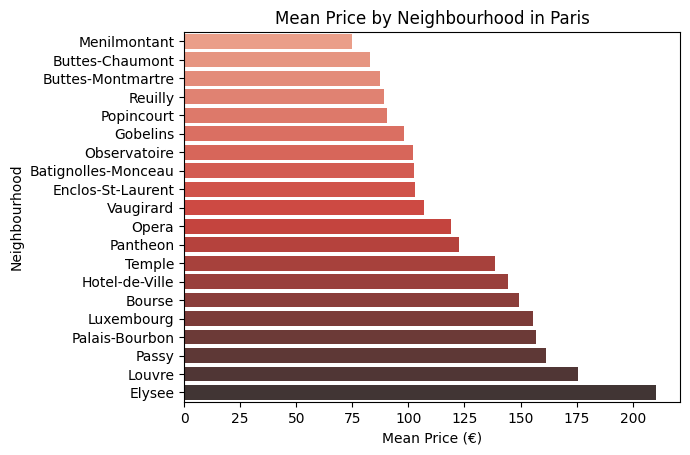

In [34]:
sns.barplot(
    data=paris_listings_neighbourhood,
    y="neighbourhood",
    x="mean_price",
    palette="Reds_d",
    hue='neighbourhood',
    legend=False
)
plt.xlabel('Mean Price (€)')
plt.ylabel('Neighbourhood')
plt.title('Mean Price by Neighbourhood in Paris')
plt.show()

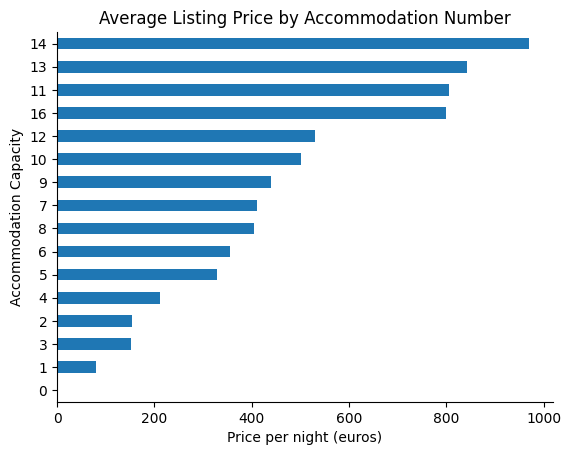

In [35]:
(paris_listings_accommodates
 .plot
 .barh(
     title='Average Listing Price by Accommodation Number',
     xlabel='Price per night (euros)',
     ylabel='Accommodation Capacity',
     legend=None
 )
)

sns.despine()

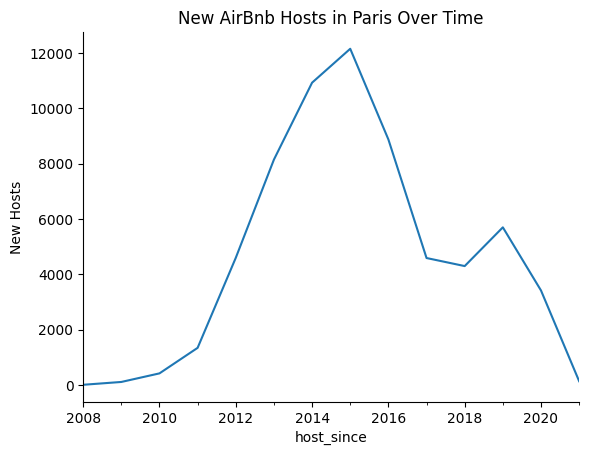

In [45]:
paris_listings_over_time['neighbourhood'].plot(
    ylabel='New Hosts',
    title='New AirBnb Hosts in Paris Over Time'
)

sns.despine()

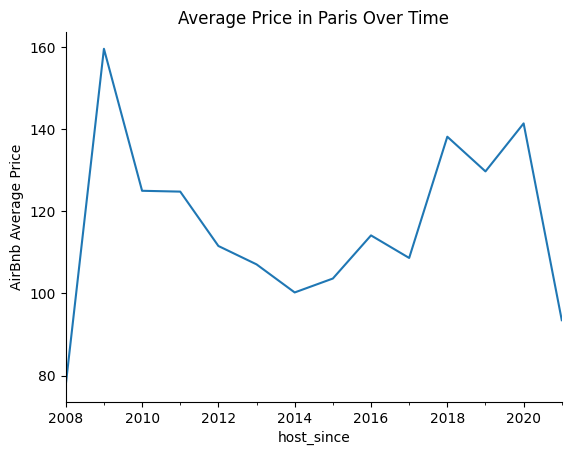

In [48]:
paris_listings_over_time['price'].plot(
    ylabel='AirBnb Average Price',
    title='Average Price in Paris Over Time'
)

sns.despine()

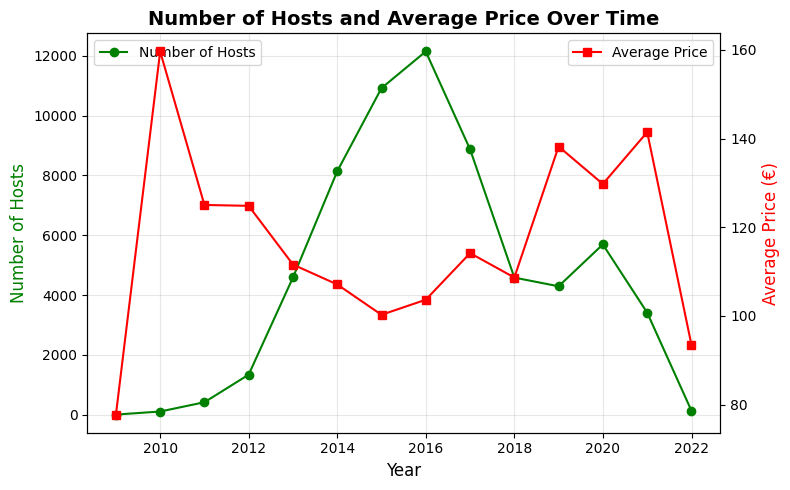

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()

ax.plot(
    paris_listings_over_time['neighbourhood'], 
    color='green', marker='o', label='Number of Hosts'
)
ax2.plot(
    paris_listings_over_time['price'], 
    color='red', marker='s', label='Average Price'
)

ax.set_title('Number of Hosts and Average Price Over Time', fontsize=14, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Hosts', fontsize=12, color='green')
ax2.set_ylabel('Average Price (€)', fontsize=12, color='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.grid(alpha=0.3)
plt.tight_layout()

plt.show()